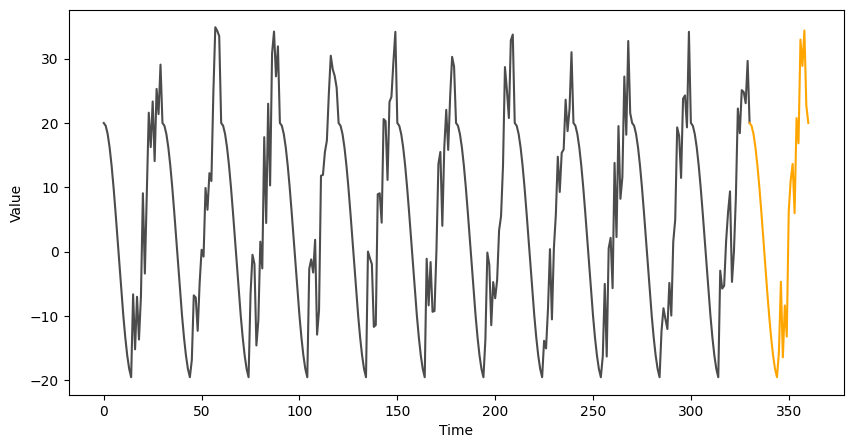

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(2020)

time = np.arange(30 * 12 + 1)
month_time = (time % 30) / 30
time_series = 20 * np.where(month_time < 0.5,
                            np.cos(2 * np.pi * month_time),
                            np.cos(2 * np.pi * month_time) + np.random.random(361))

plt.figure(figsize= (10, 5))
plt.xlabel('Time')
plt.ylabel('Value')
# 학습용 데이터
plt.plot(np.arange(0, 30 * 11 + 1),
         time_series[:30 * 11 + 1],
         color = 'black', alpha = 0.7)

# 테스트용 데이터
plt.plot(np.arange(30 * 11, 30 * 12 + 1),
         time_series[30 * 11:],
         color = 'orange')

In [2]:
def make_sequence(time_series, n):
  x_train, y_train = list(), list()

  for i in range(len(time_series)):
    x = time_series[i:(i + n)]
    if (i + n) < len(time_series):
      x_train.append(x)
      y_train.append(time_series[i + n])
    else:
      break
  return np.array(x_train), np.array(y_train)

In [3]:
time_series[:10]

array([20.        , 19.56295201, 18.27090915, 16.18033989, 13.38261213,
       10.        ,  6.18033989,  2.09056927, -2.09056927, -6.18033989])

In [4]:
n = 10 # 주기 설정
x_train, y_train = make_sequence(time_series, n)
print(f'x_train{x_train.shape}, y_train{y_train.shape}')

x_train(351, 10), y_train(351,)


In [5]:
x_train = x_train.reshape(-1, n, 1)
y_train = y_train.reshape(-1, 1)
print(f'x_train{x_train.shape}, y_train{y_train.shape}')

x_train(351, 10, 1), y_train(351, 1)


In [6]:
# 학습용 및 테스트용 데이터 분리
patial_x_train = x_train[:30 * 11]
patial_y_train = y_train[:30 * 11]
x_test = x_train[30 * 11:]
y_test = y_train[30 * 11:]
print('partial_train: ',patial_x_train.shape, patial_y_train.shape)
print('test: ', x_test.shape, y_test.shape)

partial_train:  (330, 10, 1) (330, 1)
test:  (21, 10, 1) (21, 1)


In [7]:
test_arr = np.arange(100)
a, b = make_sequence(test_arr, 10)

for i in range(20):
  print(a[i], '|', b[i])

[0 1 2 3 4 5 6 7 8 9] | 10
[ 1  2  3  4  5  6  7  8  9 10] | 11
[ 2  3  4  5  6  7  8  9 10 11] | 12
[ 3  4  5  6  7  8  9 10 11 12] | 13
[ 4  5  6  7  8  9 10 11 12 13] | 14
[ 5  6  7  8  9 10 11 12 13 14] | 15
[ 6  7  8  9 10 11 12 13 14 15] | 16
[ 7  8  9 10 11 12 13 14 15 16] | 17
[ 8  9 10 11 12 13 14 15 16 17] | 18
[ 9 10 11 12 13 14 15 16 17 18] | 19
[10 11 12 13 14 15 16 17 18 19] | 20
[11 12 13 14 15 16 17 18 19 20] | 21
[12 13 14 15 16 17 18 19 20 21] | 22
[13 14 15 16 17 18 19 20 21 22] | 23
[14 15 16 17 18 19 20 21 22 23] | 24
[15 16 17 18 19 20 21 22 23 24] | 25
[16 17 18 19 20 21 22 23 24 25] | 26
[17 18 19 20 21 22 23 24 25 26] | 27
[18 19 20 21 22 23 24 25 26 27] | 28
[19 20 21 22 23 24 25 26 27 28] | 29


In [8]:
from tensorflow.keras.layers import SimpleRNN, Flatten, Dense
from tensorflow.keras.models import Sequential

model = Sequential()

# SimpleRNN 층을 첫 번째 층으로 사용하는 경우,
# 반드시 input_shape를 명시해주어야 합니다.
model.add(SimpleRNN(units = 32, activation = 'tanh', input_shape = (n, 1)))
model.add(Dense(1, activation = 'linear'))

model.compile(optimizer = 'adam', loss = 'mse')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 32)                1088      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 1,121
Trainable params: 1,121
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.fit(patial_x_train, patial_y_train, epochs = 200, batch_size = 12)

Epoch 1/200
28/28 [==============================] - 7s 12ms/step - loss: 250.0500
Epoch 2/200
28/28 [==============================] - 0s 17ms/step - loss: 208.3983
Epoch 3/200
28/28 [==============================] - 0s 10ms/step - loss: 174.8138
Epoch 4/200
28/28 [==============================] - 0s 11ms/step - loss: 151.4504
Epoch 5/200
28/28 [==============================] - 0s 10ms/step - loss: 136.4707
Epoch 6/200
28/28 [==============================] - 0s 13ms/step - loss: 124.7979
Epoch 7/200
28/28 [==============================] - 0s 9ms/step - loss: 114.8810
Epoch 8/200
28/28 [==============================] - 0s 17ms/step - loss: 106.5457
Epoch 9/200
28/28 [==============================] - 0s 11ms/step - loss: 99.1013
Epoch 10/200
28/28 [==============================] - 0s 16ms/step - loss: 92.8593
Epoch 11/200
28/28 [==============================] - 0s 12ms/step - loss: 87.1291
Epoch 12/200
28/28 [==============================] - 1s 22ms/step - loss: 81.4933
Epoch 

1/1 [==============================] - 0s 146ms/step


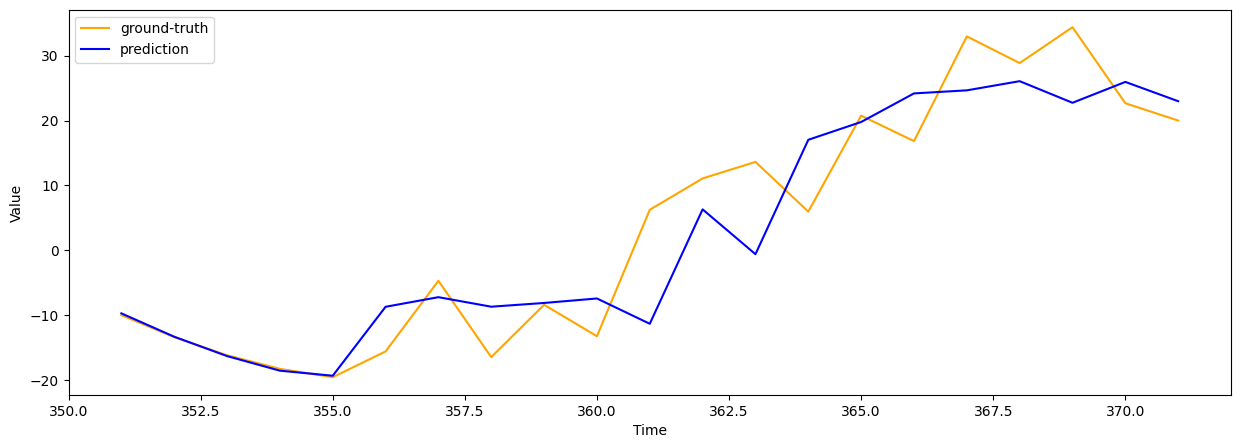

In [10]:
pred = model.predict(x_test)

pred_range = np.arange(len(y_train), len(y_train)+ len(pred))

plt.figure(figsize= (15, 5))
plt.xlabel('Time')
plt.ylabel('Value')
plt.plot(pred_range, y_test.reshape(-1, ), color='orange', label = 'ground-truth')
plt.plot(pred_range, pred.reshape(-1, ), color='blue', label = 'prediction')
plt.legend()
plt.show()

In [12]:
from tensorflow.keras.datasets import imdb

num_words = 10000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=num_words)

17464789/17464789 [==============================] - 0s 0us/step


In [13]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_len = 500

pad_X_train = pad_sequences(X_train, maxlen = max_len)
pad_X_test = pad_sequences(X_test, maxlen= max_len)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Embedding

model = Sequential()
model.add(Embedding(input_dim = num_words, output_dim = 32))
# 새로운 인자 3개가 사용되었습니다.
# return_sequences, dropout, recurrent_dropout
model.add(SimpleRNN(32, return_sequences = True, dropout = 0.15, recurrent_dropout = 0.15))
model.add(SimpleRNN(32))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['acc'])
# model.summary()
history = model.fit(pad_X_train, y_test,
                    batch_size = 32, epochs = 15,
                    validation_split = 0.2)

Epoch 1/15
625/625 [==============================] - 649s 1s/step - loss: 0.7013 - acc: 0.4998 - val_loss: 0.6933 - val_acc: 0.5046
Epoch 2/15
625/625 [==============================] - 595s 953ms/step - loss: 0.6966 - acc: 0.5005 - val_loss: 0.6931 - val_acc: 0.5070
Epoch 3/15
625/625 [==============================] - 582s 932ms/step - loss: 0.6939 - acc: 0.5132 - val_loss: 0.6958 - val_acc: 0.4942
Epoch 4/15
625/625 [==============================] - 565s 904ms/step - loss: 0.6846 - acc: 0.5519 - val_loss: 0.7018 - val_acc: 0.4950
Epoch 5/15
 40/625 [>.............................] - ETA: 8:34 - loss: 0.6557 - acc: 0.6117